# Data Wrangling


## 목표:

이 실습을 완료한 후, 다음을 할 수 있습니다:

* 누락된 값 처리  
* 데이터 형식 수정  
* 데이터 표준화 및 정규화


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href=#1>누락된 값 식별 및 처리</a>
        <ul>
            <li><a href=#1-1>누락된 값 식별</a></li>
            <li><a href=#1-2>누락된 데이터 처리</a></li>
            <li><a href=#1-3>Data Format 수정</a></li>
        </ul>
    </li>
    <li><a href=#2>Data standardization</a></li>
    <li><a href=#3>Data normalization (centering/scaling)</a></li>
    <li><a href=#4>구간화: Binning</a></li>
    <li><a href=#5>Indicator variable</a></li>
</ul>
    
</div>
 
<hr>


In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df = pd.read_csv(file_path, names = headers)

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<a id=1></a>  

# 누락된 값 식별 및 처리  

### 누락된 값 식별  
<h4>"?"를 NaN으로 변환하기</h4>  
자동차 데이터 세트에서 누락된 데이터는 "?"로 표시됩니다.  
우리는 "?"를 NaN(Not a Number)으로 대체합니다. NaN은 파이썬에서 계산 속도와 편의성을 위해 기본적으로 사용되는 누락값 표시자입니다. 아래 함수를 사용하여 A를 B로 대체할 수 있습니다:  
<pre>.replace(A, B, inplace = True)</pre>  


In [5]:
import numpy as np

# replace "?" to NaN

df.replace("?", np.nan, inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>누락된 데이터 평가</h4> {영한}  

누락된 값은 기본적으로 변환됩니다. 아래 함수를 사용하여 이러한 누락된 값을 식별할 수 있습니다. 누락된 데이터를 감지하는 두 가지 방법이 있습니다:  
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>  
출력값은 전달된 값이 실제로 누락된 데이터인지 여부를 나타내는 **불리언(boolean)값** 입니다.  

In [6]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True"는 해당 값이 누락된 값임을 의미하며, "False"는 해당 값이 누락되지 않았음을 의미합니다.

<h4>각 열의 누락된 값 개수 세기</h4> {영한}  
<p>  
파이썬의 for 루프를 사용하면 각 열에서 누락된 값의 개수를 빠르게 파악할 수 있습니다. 위에서 언급했듯이, "True"는 누락된 값을 나타내고 "False"는 데이터 세트에 값이 존재함을 의미합니다.  
for 루프의 본문에서는 메서드 <code>.value_counts()</code>를 사용하여 "True" 값의 개수를 셉니다.  
</p>  

In [7]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

<a id=1-2></a>
### 누락된 데이터 처리
<b>누락된 데이터를 어떻게 처리해야 할까요?</b>  

<ol>
    <li>데이터 삭제<br>
        a. 전체 행 삭제<br>
        b. 전체 열 삭제
    </li>
    <li>데이터 대체<br>
        a. 평균값으로 대체<br>
        b. 빈도값으로 대체<br>
        c. 다른 함수 기반으로 대체
    </li>
</ol>  

<div class='alert alert-block alert-warning'>
전체 열을 삭제하는 것은 열의 대부분의 값이 비어 있을 때만 권장됩니다. 데이터 세트에서는 어느 열도 전체적으로 비어 있지 않으므로 완전히 삭제할 필요는 없습니다.  

누락된 데이터를 대체할 방법을 선택할 수 있는 자유가 있지만, 일부 방법은 다른 방법보다 더 합리적으로 보일 수 있습니다. 각 방법을 다른 열에 적용하세요:  

<b>평균값으로 대체:</b>  
<ul>
    <li>"normalized-losses": 누락된 데이터 41개, 평균값으로 대체</li>
    <li>"stroke": 누락된 데이터 4개, 평균값으로 대체</li>
    <li>"bore": 누락된 데이터 4개, 평균값으로 대체</li>
    <li>"horsepower": 누락된 데이터 2개, 평균값으로 대체</li>
    <li>"peak-rpm": 누락된 데이터 2개, 평균값으로 대체</li>
</ul>

<b>빈도값으로 대체:</b>  
<ul>
    <li>"num-of-doors": 누락된 데이터 2개, "four"로 대체  
        <ul>
            <li>이유: 84%의 세단은 네 개의 문을 가지고 있습니다. 네 개의 문이 가장 빈도가 높으므로 가장 가능성이 높은 값입니다.</li>
        </ul>
    </li>
</ul>

<b>전체 행 삭제:</b>  
<ul>
    <li>"price": 누락된 데이터 4개, 전체 행을 삭제  
        <ul>
            <li>이유: 가격을 예측하려고 합니다. 가격 데이터가 없는 행은 예측에 사용할 수 없으므로, 가격 데이터가 없는 행은 더 이상 유용하지 않습니다.</li>
        </ul>
    </li>
</ul>  

</div>

<h4>Calculate the mean value for the "normalized-losses" column </h4>

In [9]:
avg_norm_loss = df['normalized-losses'].astype('float').mean()
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h4>Replace "NaN" with mean value in "normalized-losses" column</h4>

In [10]:
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Calculate the mean value for the "bore" column</h4>

In [1]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

NameError: name 'df' is not defined

<h4>Replace "NaN" with the mean value in the "bore" column</h4>

In [12]:
df['bore'].replace(np.nan, avg_bore, inplace=True)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "stroke" column with the mean value.</b>
</div>


In [13]:
avg_stroke = df['stroke'].astype('float').mean()
print("Average of stroke:", avg_stroke)

Average of stroke: 3.2554228855721337


In [14]:
# replace NaN by mean value in "stroke" column
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

<h4>Calculate the mean value for the "horsepower" column</h4>

In [15]:
avg_horsepower = df['horsepower'].astype('float').mean()
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


<h4>Replace "NaN" with the mean value in the "horsepower" column</h4>

In [16]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<h4>Calculate the mean value for "peak-rpm" column</h4>

In [17]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


<h4>Replace "NaN" with the mean value in the "peak-rpm" column</h4>


In [18]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

특정 열에 어떤 값이 존재하는지 확인하려면, <code>.value_counts()</code> 메서드를 사용할 수 있습니다:  

In [19]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

네 개의 문이 가장 일반적인 유형임을 확인할 수 있습니다. 또한, <code>.idxmax()</code> 메서드를 사용하여 가장 빈도가 높은 유형을 자동으로 계산할 수도 있습니다:  

In [20]:
df['num-of-doors'].value_counts().idxmax()

'four'

교체 절차는 이전에 봤던 것들과 매우 유사합니다:  

In [21]:
#replace the missing 'num-of-doors' values by the most frequent
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

마지막으로, 가격 데이터가 없는 모든 행을 삭제하세요:

In [22]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=['price'], axis=0, inplace=True)

# reset index, because we dropped two rows
df.reset_index(drop=True, inplace=True)

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b>좋아요!</b> 이제 누락된 값이 없는 데이터 세트를 확보했습니다. 😊

<a id=1-3></a>
### 데이터 형식 수정  
<b>거의 다 끝났어요!</b>  
<p>데이터 정리의 마지막 단계는 모든 데이터가 올바른 형식(정수, 실수, 텍스트 또는 기타)인지 확인하고 이를 보장하는 것입니다.</p>  

Pandas에서 다음을 사용합니다:  
<p><b>.dtype()</b>: 데이터 유형 확인</p>  
<p><b>.astype()</b>: 데이터 유형 변경</p>  


<h4>각 열의 데이터 유형을 나열해봅시다</h4>  

In [24]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>위에서 볼 수 있듯이, 일부 열의 데이터 유형이 올바르지 않습니다. 숫자 변수는 'float' 또는 'int' 유형이어야 하고, 카테고리와 같은 문자열이 포함된 변수는 'object' 유형이어야 합니다. 예를 들어, 'bore'와 'stroke'는 엔진을 설명하는 숫자 값이므로 'float' 또는 'int' 유형이어야 하지만, 현재 'object' 유형으로 표시되고 있습니다. <code>astype()</code> 메서드를 사용하여 각 열의 데이터 유형을 적절한 형식으로 변환해야 합니다.</p>  

<h4>Convert data types to proper format</h4>

In [25]:
df[['bore','stroke']] = df[['bore','stroke']].astype(float)

In [26]:
df['normalized-losses'] = df['normalized-losses'].astype('int')

In [27]:
df['price'] = df['price'].astype('float')

In [28]:
df['peak-rpm'] = df[['peak-rpm']].astype(float)

In [29]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>훌륭합니다!</b>  

이제 누락된 값이 없고 모든 데이터가 올바른 형식으로 정리된 데이터 세트를 최종적으로 얻었습니다. 😊🎉

<a id=2></a>
## 데이터 표준화  

<p>데이터는 종종 서로 다른 기관에서 서로 다른 형식으로 수집됩니다.  
(데이터 표준화는 평균을 빼고 표준 편차로 나누는 특정 유형의 데이터 정규화를 의미하기도 합니다.)</p>  

<b>표준화란 무엇인가요?</b>  
<p>표준화는 데이터를 공통 형식으로 변환하여 연구자가 의미 있는 비교를 할 수 있도록 하는 과정입니다.</p>  

<b>예시</b>  
<p>mpg(마일당 갤런)를 L/100km로 변환하기:</p>  
<p>데이터 세트에서 연료 소비를 나타내는 열인 "city-mpg"와 "highway-mpg"는 mpg(마일당 갤런) 단위로 표시됩니다. 연료 소비를 L/100km 기준으로 사용하는 국가에서 애플리케이션을 개발한다고 가정해 보세요.</p>  
<p>mpg를 L/100km로 변환하려면 <b>데이터 변환</b>이 필요합니다.</p>  

<p>다음 공식을 사용하여 단위를 변환하세요:</p>  
L/100km = 235 / mpg  

<p>Pandas를 사용하면 많은 수학 연산을 직접 수행할 수 있습니다.</p>  

In [30]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [31]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df['city-mpg']

In [32]:
# check your transformed data
df[['city-L/100km', 'city-mpg']]

,city-L/100km,city-mpg
0,11.190476,21
1,11.190476,21
2,12.368421,19
3,9.791667,24
4,13.055556,18
...,...,...
196,10.217391,23
197,12.368421,19
198,13.055556,18
199,9.038462,26


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".</b>
</div>


In [33]:
df['highway-mpg'] = 235/df['highway-mpg']

In [34]:
df.rename(columns = {'highway-mpg':'highway-L/100km'}, inplace=True)

In [35]:
# check
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


<a id=3></a>
## 데이터 정규화  : Data Normalization

<b>왜 정규화가 필요할까요?</b>  
<p>정규화는 여러 변수의 값을 비슷한 범위로 변환하는 과정입니다. 일반적인 정규화 방법에는 다음이 포함됩니다:  
<ol>
    <li>변수를 평균이 0이 되도록 스케일링</li>
    <li>변수를 분산이 1이 되도록 스케일링</li>  
    <li>변수 값을 0에서 1 사이로 스케일링</li>
</ol>
</p>  

<b>예시</b>  
<p>정규화를 설명하기 위해, "length", "width", "height" 열을 스케일링한다고 가정해 봅시다.</p>  
<p><b>목표:</b> 해당 변수들을 0에서 1 사이 값으로 정규화</p>  
<p><b>방법:</b> 원래 값을 (원래 값)/(최대 값)으로 대체</p>  

In [36]:
# replace (original value) by (original value) / (maximum value)
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the column "height".</b>
</div>


In [37]:
df['height'] = df['height'] / df['height'].max()

In [38]:
# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


여기에서 "length", "width", "height"를 [0, 1] 범위로 정규화했습니다.  

<a id=4></a>
## 구간화 (Binning)  

<b>왜 구간화를 할까요?</b>  
<p>구간화는 연속적인 숫자 변수를 이산적인 카테고리 '구간(bins)'으로 변환하여 그룹화된 분석을 가능하게 하는 과정입니다.</p>  

<b>예시:</b>  
<p>데이터 세트에서 "horsepower"는 48에서 288 사이의 실수형 변수이며, 59개의 고유한 값을 가지고 있습니다.  
만약 당신이 높은 마력, 중간 마력, 낮은 마력을 가진 자동차들 간의 가격 차이에만 관심이 있다면 (총 3가지 유형), 이를 세 가지 '구간'으로 나누어 분석을 단순화할 수 있습니다.</p>  

<p>Pandas 메서드 <code>cut</code>을 사용하여 'horsepower' 열을 세 개의 구간으로 나누세요.</p>  

<h3>Example of Binning Data In Pandas</h3>

Convert data to correct format:

In [39]:
df['horsepower'] = df['horsepower'].astype('int', copy=True)

<div class='alret alert-block alert-info'>
Pandas에서 copy=True는 데이터프레임이나 시리즈를 복사하여 작업할지 여부를 결정하는 매개변수입니다.

copy=True (기본값): 원본 데이터를 변경하지 않고 복사본을 생성하여 작업합니다. 따라서 원본 데이터는 그대로 유지됩니다.
</div>

다음은 horsepower의 분포를 확인하기 위해 히스토그램을 그립니다.

Text(0.5, 1.0, 'horsepower bins')

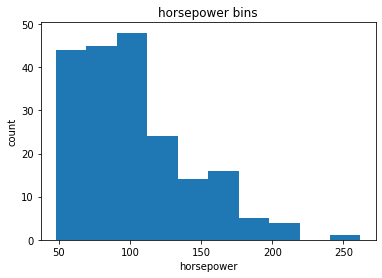

In [40]:
import matplotlib.pyplot as plt

plt.hist(df['horsepower'])

# set x/y label and plot title
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

<p>다음은 Numpy의 <code>linspace(start_value, end_value, numbers_generated)</code> 함수를 사용하여 <b>동일한 크기의 대역폭을 가진 3개의 구간</b>을 찾는 방법입니다.</p>  
<p>마력(horsepower)의 최소값을 포함하려면, <code>start_value = min(df["horsepower"])</code>로 설정하세요.</p>  
<p>마력의 최대값을 포함하려면, <code>end_value = max(df["horsepower"])</code>로 설정하세요.</p>  
<p>동일한 길이의 3개의 구간을 생성하려면, 4개의 구분선이 필요하므로 <code>numbers_generated = 4</code>로 설정하세요.</p>

위에서 계산한 대역폭(bandwidth)을 사용하여 최소값에서 최대값까지의 구간 배열(bin array)을 만드세요. 이 값들은 하나의 구간이 끝나고 다음 구간이 시작되는 지점을 결정합니다.

In [41]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

bin group 이름을 설정합니다:

In [42]:
group_names = ['Low', 'Medium', 'High']

<code>cut</code> 함수를 사용하여 `df['horsepower']`의 각 값이 어떤 구간(bin)에 속하는지 결정하세요.

In [43]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


`include_lowest=True`는 가장 낮은 구간의 경계값을 포함할지 여부를 결정하는 매개변수입니다.

<div class='alert alert-block alert-info'>
    <p>
예를 들어, bins=[10, 20, 30]이고 include_lowest=True인 경우 10 ≤ x < 20인 데이터는 첫 번째 구간에 속하고, 20 ≤ x < 30인 데이터는 두 번째 구간에 속합니다. 10과 같은 값도 첫 번째 구간에 포함됩니다. </p>

반면 include_lowest=False인 경우 10 < x < 20인 데이터만 첫 번째 구간에 속하고, 20 ≤ x < 30인 데이터는 두 번째 구간에 속합니다. 10과 같은 값은 어떤 구간에도 속하지 않습니다.
</div>

각 구간(bin)에 속하는 차량의 수를 확인하세요.

In [44]:
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Plot the distribution of each bin:

Text(0.5, 1.0, 'horsepower bins')

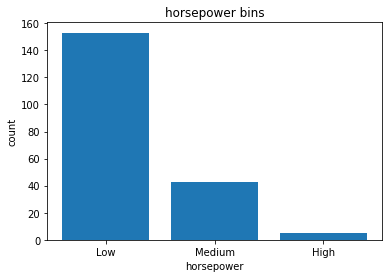

In [45]:
plt.bar(group_names, df['horsepower-binned'].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<p>위 데이터 프레임을 주의 깊게 살펴보세요. 마지막 열은 3개의 범주(<code>"Low"</code>, <code>"Medium"</code>, <code>"High"</code>)를 기준으로 "horsepower"의 구간을 제공합니다.</p>  
<p>59개의 구간을 3개로 성공적으로 좁혔습니다!</p>  

<h3>구간 (Bins) 시각화</h3>  
일반적으로, 위에서 생성한 구간의 분포를 시각화하려면 히스토그램을 사용합니다.

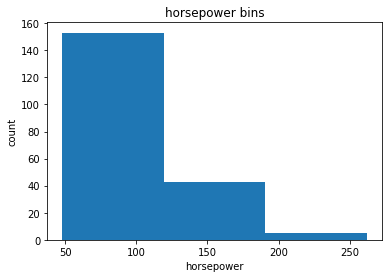

In [46]:
plt.hist(df['horsepower'], bins = 3)

plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins');

위 그래프는 "horsepower" 속성에 대한 구간화(binning) 결과를 보여줍니다.

<a id=5></a>
## Indicator Variable : 지표 변수  
<b>지표 변수란 무엇인가요?</b>  
<p>  
지표 변수(또는 더미 변수)는 범주를 표시하는 데 사용되는 숫자 변수입니다. '더미'라고 불리는 이유는 해당 숫자 자체에 고유한 의미가 없기 때문입니다.  
</p>  

<b>지표 변수를 사용하는 이유는 무엇인가요?</b>  
<p>  
지표 변수는 나중에 회귀 분석에 범주형 변수를 사용할 수 있도록 하기 위해 사용됩니다.  
</p>  

<b>예시</b>  
<p>  
"fuel-type" 열에는 "gas"와 "diesel"이라는 두 가지 고유 값이 있습니다. 회귀 분석은 단어를 이해하지 못하고 숫자만 이해합니다. 이 속성을 회귀 분석에 사용하려면 "fuel-type"을 지표 변수로 변환해야 합니다.  
</p>  

<p>  
Pandas 메서드 <code>'get_dummies'</code>를 사용하여 연료 유형(fuel type)의 각 범주에 숫자 값을 할당하세요.  
</p>  

In [47]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [48]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Change the column names for clarity:

In [49]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [50]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis =1 , inplace=True)

In [51]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


마지막 두 열은 이제 fuel-type 변수의 지표 변수 표현입니다. 이 값들은 모두 0과 1로 변환되었습니다.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "aspiration"</b>


<b>Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.</b>
</div>


In [56]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'}, inplace=True)
df.drop('aspiration', axis=1, inplace=True)
df = pd.concat([df, dummy_variable_2], axis = 1)

In [57]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


Save the new csv:

In [ ]:
df.to_csv('clean_df.csv')

### Thank you for completing this lab!

<hr>

# **Hands-on Practice Lab: Data Wrangling**


이 실습에서는 모듈에서 습득한 기술을 사용하여 누락된 데이터를 처리하고, 데이터 프레임 속성의 데이터 유형을 수정하며, 데이터셋의 특정 속성에 대해 데이터 표준화와 정규화 과정을 수행합니다.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(file_path, header = 0)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [65]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


 
`numpy.round()`를 사용하여 `Screen_Size_cm` 열의 모든 값을 소수점 두 자리로 반올림하도록 업데이트할 수 있습니다.

In [68]:
df['Screen_Size_cm'] = np.round(df['Screen_Size_cm'], 2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


# Task - 1


### 데이터셋에서 누락된 데이터 평가  
누락된 데이터는 이전에 '?'에서 `numpy.NaN`으로 변환되었습니다. Pandas는 NaN과 Null 값을 동일하게 취급합니다. 즉, Null 값을 가진 항목을 식별하기만 하면 됩니다. 누락된 데이터가 있는 열을 식별하는 코드를 작성하세요.

In [69]:
df.isnull().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

# Task - 2  

### 평균값으로 대체  
연속 데이터를 가진 속성에서 누락된 값은 평균값으로 대체하는 것이 가장 좋습니다. "Weight_kg" 속성의 값이 연속적이며 일부 값이 누락되어 있음을 확인합니다. 따라서 이 속성의 누락된 값을 평균값으로 대체하는 코드를 작성하세요.  

In [72]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [73]:
avg_weight_kg = df['Weight_kg'].mean()
df['Weight_kg'].replace(np.nan, avg_weight_kg, inplace=True)

### 가장 빈도가 높은 값으로 대체  
범주형 데이터를 가진 속성에서 누락된 값은 가장 빈도가 높은 값으로 대체하는 것이 가장 좋습니다. "Screen_Size_cm" 속성의 값이 범주형이며 일부 값이 누락되어 있음을 확인합니다. 따라서 이 속성의 누락된 값을 해당 속성의 가장 빈도가 높은 값으로 대체하는 코드를 작성하세요.

In [77]:
df.isnull().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [80]:
df['Screen_Size_cm'].value_counts()

39.62    89
35.56    64
38.10    23
33.78    20
33.02    18
43.94     7
43.18     5
31.75     4
30.48     4
Name: Screen_Size_cm, dtype: int64

In [82]:
most_frequent_value = df['Screen_Size_cm'].value_counts().idxmax()
most_frequent_value

39.62

In [83]:
df['Screen_Size_cm'].replace(np.nan, most_frequent_value, inplace=True)

# Task - 3

 

### 데이터 유형 수정  
"Weight_kg"와 "Screen_Size_cm" 열의 데이터 유형이 "Object"로 되어 있으나, 두 열 모두 "float" 데이터 유형을 가져야 합니다. 이 두 열의 데이터 유형을 수정하는 코드를 작성하세요.  

In [85]:
df[['Weight_kg', 'Screen_Size_cm']] = df[['Weight_kg', 'Screen_Size_cm']].astype(float)

# Task - 4



### 데이터 표준화  
`Screen_Size` 값은 일반적으로 인치 단위를 사용합니다. 이와 마찬가지로, 노트북의 무게는 파운드 단위로 변경되어야 합니다. 아래의 변환 단위를 사용하여 데이터프레임의 열을 수정하는 코드를 작성하세요. 또한, 열 이름도 업데이트하세요.  

```{math}
1 인치 = 2.54 cm  
1 kg = 2.205 파운드  
```

In [97]:
df['Screen_Size_cm'] = df.Screen_Size_cm / 2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace = True)

In [98]:
df['Weight_kg'] = df.Weight_kg * 2.205
df.rename(columns = {'Weight_kg':'Weight_pounds'}, inplace=True)


### 데이터 정규화  
연속형 데이터 속성은 종종 정규화가 필요합니다. 데이터셋에서 사용 가능한 최대값을 기준으로 "CPU_frequency" 속성을 정규화하는 코드를 작성하세요.

In [102]:
df['CPU_frequency'] = df['CPU_frequency'] / df['CPU_frequency'].max()

# Task - 5


### 구간화 (Binning)  
구간화는 연속형 데이터를 지정된 그룹 수로 나누어 범주형 속성을 생성하는 과정입니다. 이번에는 "Price" 속성을 기준으로 3개의 구간을 생성하는 코드를 작성하세요. 이 구간은 "Low", "Medium", "High"로 이름을 지정합니다. 새로 생성된 속성의 이름은 "Price-binned"입니다.

In [104]:
df.Price.dtypes

dtype('int64')

In [108]:
# 3개의 구간이 필요하려면 4개의 구분선이 필요
bins = np.linspace(min(df.Price), max(df.Price), 4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [110]:
group_names = ['Low', 'Medium', 'High']

df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)

Also, plot the bar graph of these bins.

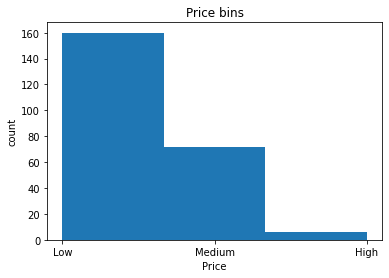

In [113]:
import matplotlib.pyplot as plt

plt.hist(df['Price-binned'], bins = 3)
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins");

# Task - 6


### 지표 변수 (Indicator variables)  
데이터셋의 "Screen" 속성을 두 개의 지표 변수, "Screen-IPS_panel"과 "Screen-Full_HD"로 변환하세요. 그런 다음 데이터셋에서 "Screen" 속성을 삭제하세요.

In [117]:
screen_variables = pd.get_dummies(df.Screen)
screen_variables.rename(columns={'Full HD':'Screen-Full_HD','IPS Panel':'Screen-IPS_panel'}, inplace=True)
screen_variables

,Screen-Full_HD,Screen-IPS_panel
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
233,0,1
234,1,0
235,0,1
236,1,0


In [119]:
df = pd.concat([df, screen_variables], axis = 1)

In [120]:
df.drop('Screen', axis = 1, inplace=True)

In [121]:
df.columns

Index(['Unnamed: 0', 'Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_inch', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_pounds', 'Price', 'Price-binned', 'Screen-Full_HD',
       'Screen-IPS_panel'],
      dtype='object')

In [122]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,0,1
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,1,0
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,1,0
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,0,1
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,1,0


# Congratulations! You have completed the lab
